# Project_2.Разведывательный анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(15))

stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
                     'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
                     'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score']
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

# Итого:
    Строковых столбцов:17
    Числовых столбцов:13

In [3]:
# Functions
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.boxplot(x=column, y='score',
                data=zeromen,
                ax=ax)
    plt.xticks()
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_boxplot2(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column,
                y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def IQR(column):
    median = stud_math[column].median()
    IQR = stud_math[column].quantile(0.75) - stud_math[column].quantile(0.25)
    perc25 = stud_math[column].quantile(0.25)
    perc75 = stud_math[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    sns.boxplot(x=column, data=stud_math)
    stud_math[column].describe()


def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

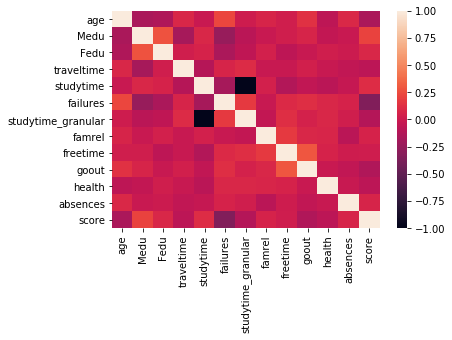

In [4]:
sns.heatmap(stud_math.corr())

In [5]:
stud_math = stud_math.drop(['studytime_granular'], axis=1)

In [6]:
# проверим данные на наличие пустых элементов, а затем пройдемся по каждому столбику
stud_math.isnull().sum()

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

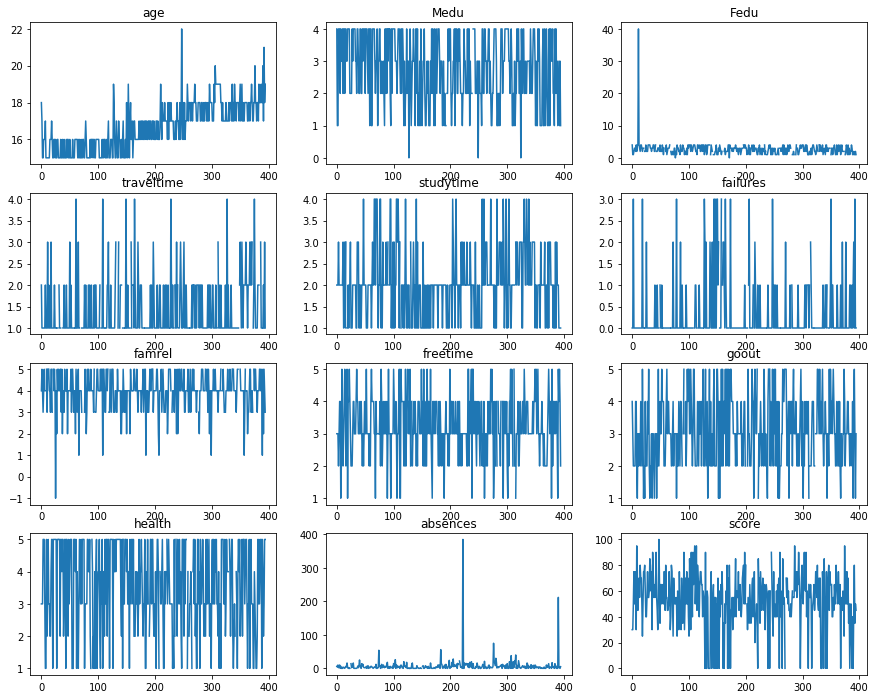

In [7]:
# рассмотрим сначала все колонки с числовыми данными, потому что их меньше
stud_math_numbers = pd.DataFrame(stud_math.select_dtypes(include='number'))
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
i = 0
y = 0
for col in stud_math_numbers.columns:
    axes[i][y].plot(stud_math_numbers[col])
    axes[i][y].set_title(col)
    y += 1
    if y == 3:
        y = 0
        i += 1

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


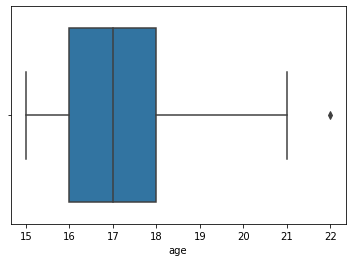

In [8]:
# На графиках заметны выбросы на большем числе графиков, рассмотрим каждый по отдельности
IQR('age')

In [9]:
# На боксплоте снова наблюдается выброс, в датафрейм попалу ученик в возрасте 22 года.
stud_math = stud_math.loc[stud_math.age <= 21]

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


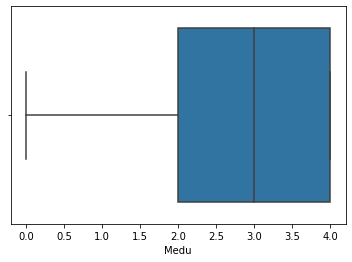

In [10]:
# Обрабатываем колонку Medu
IQR('Medu')
# Выбросы отсутствуют, есть три пропуска, проверим их

In [11]:
stud_math[(stud_math.Medu.isnull() == True)]
# Судя по данным, мама 193 работает на гос.службе, для этого нужно высшее образование, добавим ей его

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


In [12]:
stud_math.loc[(stud_math.Medu.isnull() == True) & (
    stud_math.Mjob == 'services'), 'Medu'] = 4

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


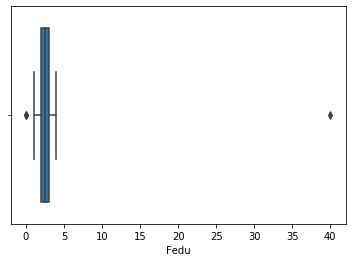

In [13]:
# Обрабатываем колонку Fedu, предположительно, она имеет выброс
IQR('Fedu')

In [14]:
# Вероятно, данные содержат ошибку вместо 40, скорее всего должна быть 4, исправляем ошибку
stud_math.loc[(stud_math.Fedu == 40), 'Fedu'] = 4

In [15]:
stud_math[(stud_math.Fedu.isnull() == True)]
# наблюдается очень много отцов, которые работают на гос.службе, учителями и в сфере здравоохранения
# у всех учителей точно должно быть высшее образование
# со сферой здравоохранения не все так просто, он может быть мед.братом, может быть врачом.Таких значений 2, не будем заменять.
# гос.служба предполагает высшее образование

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


In [16]:
stud_math.loc[(stud_math.Fedu.isnull() == True) & (
    stud_math.Fjob == 'services'), 'Fedu'] = 4
stud_math.loc[(stud_math.Fedu.isnull() == True) & (
    stud_math.Fjob == 'teacher'), 'Fedu'] = 4

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


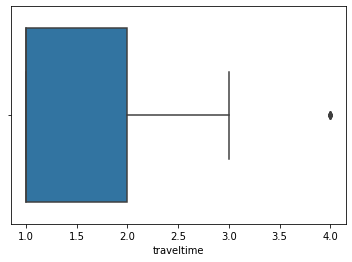

In [17]:
# Обрабатываем колонку Traveltime
IQR('traveltime')
# имеются выбросы, и 28 пустых значений, посмотрим на них

In [18]:
stud_math[(stud_math.traveltime.isnull() == True)]
# однозначно, если при выборе школы в приоритете было близкое расположение, то добираться до нее не больше 15 минут.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0


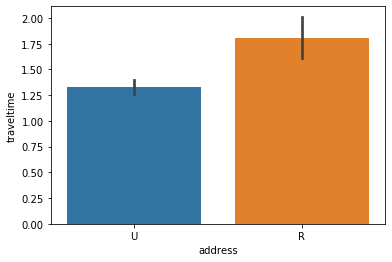

In [19]:
stud_math.loc[(stud_math.traveltime.isnull() == True) &
              (stud_math.reason == 'home'), 'traveltime'] = 1
# проверим, как далеко сельская местность от школы
sns.barplot(x='address', y='traveltime', data=stud_math)
# судя по графикам сельская местность не означает, что ребенок тратит больше часа на дорогу до школы, оставляем как есть.

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


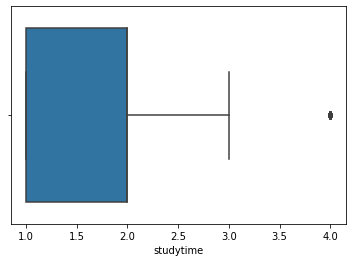

In [20]:
# Обрабатываем колонку studytime
IQR('studytime')
# имеются выбросы, 7 пропусков, посмотрим на них

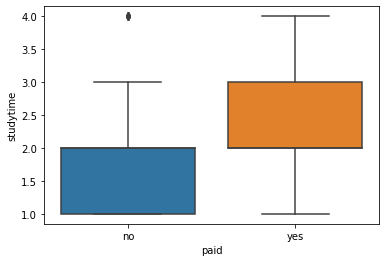

In [21]:
stud_math[(stud_math.studytime.isnull() == True)]
# видно, что большинство учеников берут доп.занятия по метематике, посмотрим, как это связано с параметром studytime
sns.boxplot(x='paid', y='studytime', data=stud_math)

In [22]:
# судя по всему, занятия по математике длятся от 2-5 часов, заменим пустые значения
stud_math.loc[(stud_math.studytime.isnull() == True) &
              (stud_math.paid == 'yes'), 'studytime'] = 2

In [23]:
# Обрабатываем колонку failures
stud_math.failures.value_counts()
# большинство учеников не испытывало трудностей с учебой, поэтому неудачи скорее являются выбросами для данной колонки
# В датафрейме 22 пустых значение, посмотрим на них

0.0    293
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64

In [24]:
stud_math[(stud_math.failures.isnull() == True)]
# можно попытаться связать неудачи с пропусками, но мы не может быть уверены в их кол-ве, поэтому оставляем как есть

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,NaN,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


 4.0    182
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

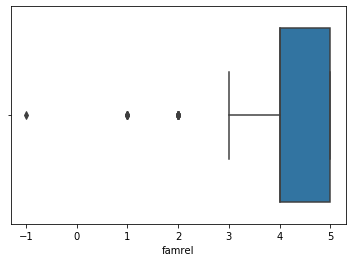

In [25]:
# Обрабатываем колонку famrel
IQR('famrel')
stud_math.famrel.value_counts()

In [26]:
# очевидная ошибка в данных. Критерий может иметь оценку от 1 до 5 баллов, в данном случае есть отрицательная величина
stud_math.loc[stud_math.famrel == -1, 'famrel'] = 1
# у большинства учеников хорошие отношения с родителями, обратное скорее является исключением

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


4.0    182
5.0     98
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

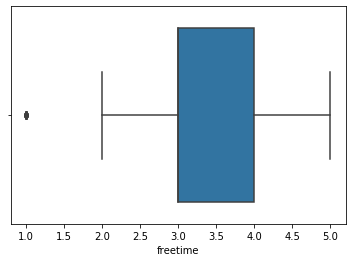

In [27]:
# Обрабатываем колонку freetime
IQR('freetime')
stud_math.famrel.value_counts()
# большинство учеников имеют достаточно свободного времени

In [28]:
# посмотрим на пустые значение
stud_math[(stud_math.freetime.isnull() == True)]
#  посмотрим, зависит ли свободное время от романтических отношений

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
290,GP,M,18,U,GT3,T,4.0,NaN,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,NaN,2.0,5.0,11.0,55.0
291,GP,F,17,U,GT3,T,4.0,3.0,NaN,services,reputation,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


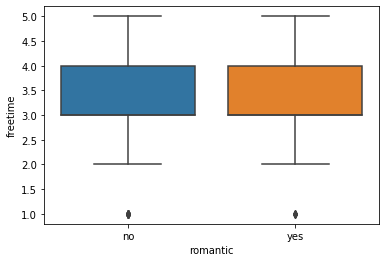

In [29]:
sns.boxplot(x='romantic', y='freetime', data=stud_math)
# судя по всему нет, жаль)

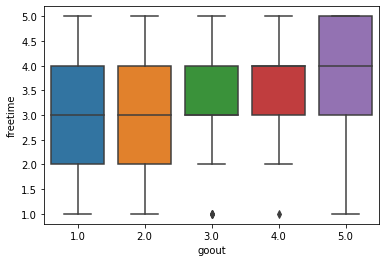

In [30]:
# проверим есть ли связь с друзьями
sns.boxplot(x='goout', y='freetime', data=stud_math)
# заметна корреляция, чем больше свободного времени, тем больше ученик проводит времени с друзьями,заменим на средние значения

In [31]:
stud_math.loc[(stud_math.freetime.isnull() == True) &
              (stud_math.goout == 1), 'freetime'] = 3
stud_math.loc[(stud_math.freetime.isnull() == True) &
              (stud_math.goout == 2), 'freetime'] = 3
stud_math.loc[(stud_math.freetime.isnull() == True) &
              (stud_math.goout == 3), 'freetime'] = 3
stud_math.loc[(stud_math.freetime.isnull() == True) &
              (stud_math.goout == 4), 'freetime'] = 3
stud_math.loc[(stud_math.freetime.isnull() == True) &
              (stud_math.goout == 5), 'freetime'] = 4

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


3.0    127
2.0    101
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

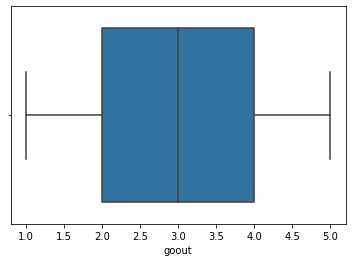

In [32]:
# Обрабатываем колонку goout
IQR('goout')
stud_math.goout.value_counts()
# выбросов нет, пропусков 8, заменим так же, как и в предыдущем случае

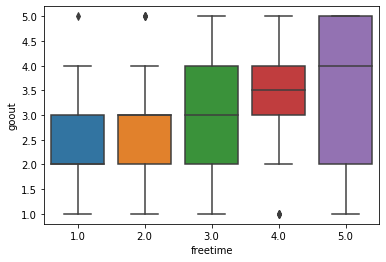

In [33]:
sns.boxplot(x='freetime', y='goout', data=stud_math)

In [34]:
stud_math.loc[(stud_math.goout.isnull() == True) &
              (stud_math.freetime == 1), 'goout'] = 2
stud_math.loc[(stud_math.goout.isnull() == True) &
              (stud_math.freetime == 2), 'goout'] = 2
stud_math.loc[(stud_math.goout.isnull() == True) &
              (stud_math.freetime == 3), 'goout'] = 3
stud_math.loc[(stud_math.goout.isnull() == True) &
              (stud_math.freetime == 4), 'goout'] = 3.5
stud_math.loc[(stud_math.goout.isnull() == True) &
              (stud_math.freetime == 5), 'goout'] = 4

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


5.0    138
3.0     89
4.0     63
1.0     46
2.0     43
Name: health, dtype: int64

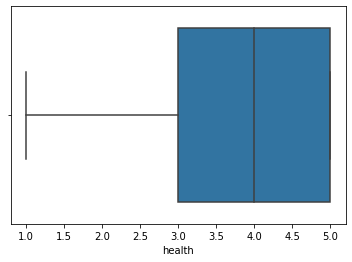

In [35]:
# Обрабатываем колонку health
IQR('health')
stud_math.health.value_counts()
# выбросов нет, пропусков 15, попробуем заполнить на основании идео и том, что если родители работают в здравоохранении, то здоровье ребенка в порядке

In [36]:
stud_math.loc[(stud_math.health.isnull() == True) &
              (stud_math.Mjob == 'health'), 'health'] = 5
stud_math.loc[(stud_math.health.isnull() == True) &
              (stud_math.Fjob == 'health'), 'health'] = 5
stud_math.health.value_counts()
# Мда, много добавить не удалось)

5.0    139
3.0     89
4.0     63
1.0     46
2.0     43
Name: health, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


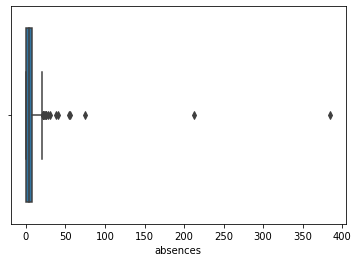

In [37]:
# Обрабатываем колонку absences, предположительно она содержит выбросы
IQR('absences')

In [80]:
# очевидная ошибка, обнаружены огромные выбросы, отфильтруем данные
stud_math = stud_math.loc[(stud_math.absences >= -12)
                          & (stud_math.absences <= 20)]

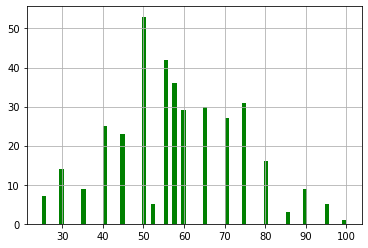

In [81]:
# Рассмотрим целевую переменную score, она имеет 6 пустых значений
stud_math.score.hist(color='green', bins=70)
# Наблюдается большое кол-во результата =0

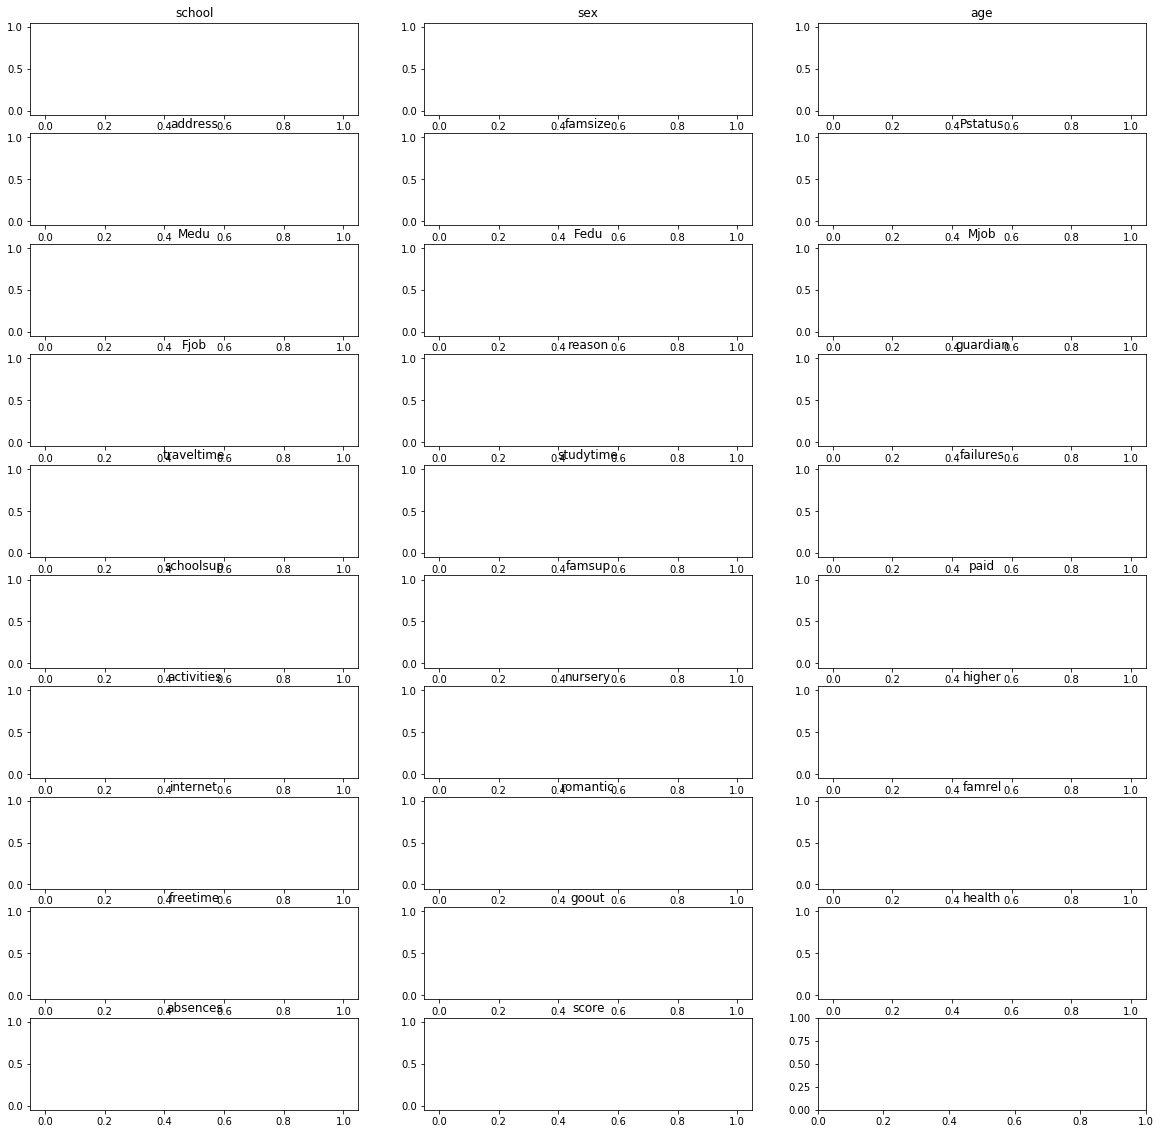

In [82]:
zeromen = stud_math[stud_math.score == 0]
fig, axes = plt.subplots(10, 3, figsize=(20, 20))
i = 0
y = 0
for col in zeromen.columns:
    axes[i][y].bar(x=zeromen[col].value_counts().index,
                   height=zeromen[col].value_counts())
    axes[i][y].set_title(col)
    y += 1
    if y == 3:
        y = 0
        i += 1
# По графику о неудачах заметно, что школьники, получившие оценку 0 испытывали сложности с учебой, также часть из них имела проблемы со здоровьем
# возможно 0 получили те, кто просто не пришел

In [83]:
# есть пропуски, заменим их на среднее, чтобы не портить статистику
stud_math.loc[stud_math.score.isnull() == True,
              'score'] = stud_math.score.mean()

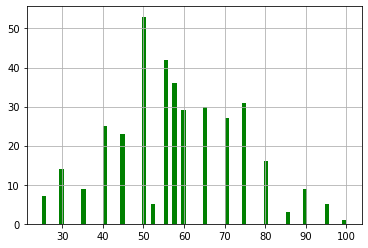

In [84]:
# Заполним пропуски средним значением, статистика от этого не изменится, но мы избавимся от пропусков
stud_math.score = stud_math.score[stud_math.score != 0]
stud_math.score.hist(color='green', bins=70)

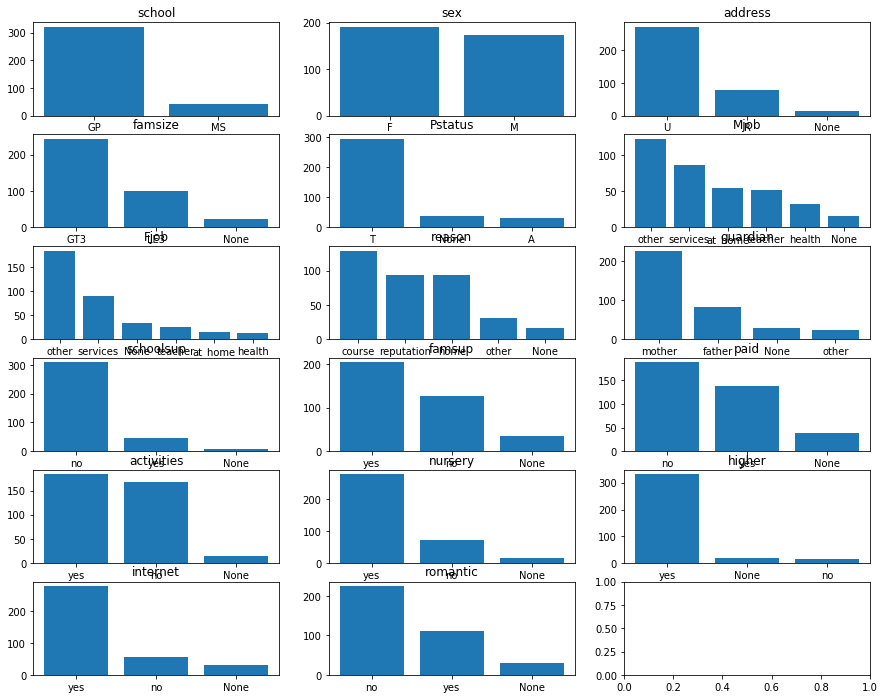

In [43]:
# рассмотрим сначала все колонки с нечисловые данными,проверяя есть ли пустые значения
stud_math_object = pd.DataFrame(stud_math.select_dtypes(include=[object]))
fig, axes = plt.subplots(6, 3, figsize=(15, 12))
i = 0
y = 0
for col in stud_math_object.columns:
    stud_math_object[col].fillna(value='None', inplace=True)
    axes[i][y].bar(x=stud_math_object[col].value_counts().index,
                   height=stud_math_object[col].value_counts())
    axes[i][y].set_title(col)
    y += 1
    if y == 3:
        y = 0
        i += 1

In [44]:
# Проверяем каждый в отдельности
# School пропускаем, нет пустых значений, по графику все видно, большинство учеников посещают школу GP
# Sex  тоже пропускаем, нет пустых значений,большинство учащихся-девочки
# Проверяем колонку address
stud_math.loc[:, ['address']].info()
pd.DataFrame(stud_math.address.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  350 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,address
U,272
R,78


In [45]:
# анализ данных показал, что нельзя отталкиваться от параметра timetravel, поэтому оставляем без изменений

In [46]:
# Проверяем колонку famsize
stud_math.loc[:, ['famsize']].info()
pd.DataFrame(stud_math.famsize.value_counts())
# 27 пропусков, но на основании имеющихся данных ничего не можем сделать

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  343 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,famsize
GT3,244
LE3,99


In [47]:
# Проверяем колонку Pstatus
stud_math.loc[:, ['Pstatus']].info()
pd.DataFrame(stud_math.Pstatus.value_counts())
# 45 пустых значений, скорее всего если в семье больше 3 человек, то родители живут вместе

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  327 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,Pstatus
T,295
A,32


In [48]:
stud_math.loc[(stud_math.Pstatus.isnull() == True) & (
    stud_math.famsize == 'GT3'), 'Pstatus'] = "T"
pd.DataFrame(stud_math.Pstatus.value_counts())

,Pstatus
T,320
A,32


In [49]:
# Проверяем колонку Mjob
stud_math.loc[:, ['Mjob']].info()
pd.DataFrame(stud_math.Mjob.value_counts())
# в ней 19 пустых значений, но данных на их замену нет, оставляем так

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    349 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,Mjob
other,123
services,87
at_home,55
teacher,52
health,32


In [50]:
# Проверяем колонку Fjob
stud_math.loc[:, ['Fjob']].info()
pd.DataFrame(stud_math.Mjob.value_counts())
# в ней 36 пустых значений, но данных на их замену нет, оставляем так

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    331 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,Mjob
other,123
services,87
at_home,55
teacher,52
health,32


In [51]:
# Проверяем колонку reason
stud_math.loc[:, ['reason']].info()
pd.DataFrame(stud_math.reason.value_counts())
# Проверим, сколько учеников живет в 15 минутха ходьбы от школы и заменим пустые значения на home

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  348 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,reason
course,129
reputation,94
home,94
other,31


In [52]:
stud_math.loc[(stud_math.reason.isnull() == True) & (
    stud_math.traveltime == 1), 'reason'] = 'home'
pd.DataFrame(stud_math.reason.value_counts())

,reason
course,129
home,107
reputation,94
other,31


In [53]:
# Проверяем колонку guardian
stud_math.loc[:, ['guardian']].info()
pd.DataFrame(stud_math.guardian.value_counts())
# всего 31 пропущенное значение, проверим статус работы родителя, если он работает из дома,то он и есть опекун

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  335 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,guardian
mother,228
father,83
other,24


In [54]:
stud_math.loc[(stud_math.guardian.isnull() == True) & (
    stud_math.Mjob == 'at_home'), 'guardian'] = 'mother'
stud_math.loc[(stud_math.guardian.isnull() == True) & (
    stud_math.Fjob == 'at_home'), 'guardian'] = 'father'
pd.DataFrame(stud_math.guardian.value_counts())

,guardian
mother,235
father,83
other,24


In [55]:
# Проверяем колонку schoolsup
stud_math.loc[:, ['schoolsup']].info()
pd.DataFrame(stud_math.schoolsup.value_counts())
# есть 9 пустых значений, но нет основательных предположений, чтобы это изменить

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  356 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,schoolsup
no,309
yes,47


In [56]:
# Проверяем колонку famsup
stud_math.loc[:, ['famsup']].info()
pd.DataFrame(stud_math.famsup.value_counts())
# есть 39 пустых значений, но нет основательных предположений, чтобы это изменить

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  330 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,famsup
yes,204
no,126


In [57]:
# Проверяем колонку paid
stud_math.loc[:, ['paid']].info()
pd.DataFrame(stud_math.paid.value_counts())
# есть 40 пустых значений, но нет основательных предположений, чтобы это изменить

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    327 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,paid
no,188
yes,139


In [58]:
# Проверяем колонку activities
stud_math.loc[:, ['activities']].info()
pd.DataFrame(stud_math.activities.value_counts())
# есть 14 пустых значений, но нет основательных предположений, чтобы это изменить

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  351 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,activities
yes,184
no,167


In [59]:
# Проверяем колонку nursery
stud_math.loc[:, ['nursery']].info()
pd.DataFrame(stud_math.nursery.value_counts())
# есть 16 пустых значений, посмотрим эти значения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  349 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,nursery
yes,277
no,72


In [60]:
stud_math[stud_math.nursery.isnull() == True]
# скорее всего, если родитель работает из дома, то ребенок в садик не ходил

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.000000
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,80.000000
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,reputation,father,2.0,2.0,2.0,no,no,yes,no,NaN,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.000000
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.000000
152,GP,F,15,R,GT3,T,3.0,3.0,services,NaN,reputation,other,2.0,3.0,2.0,no,yes,yes,yes,NaN,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.000000
212,GP,F,16,U,GT3,A,2.0,2.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,yes,NaN,NaN,yes,yes,no,3.0,3.0,4.0,4.0,0.0,70.000000
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,NaN,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.000000
300,GP,F,18,U,LE3,A,4.0,4.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,no,NaN,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.000000
332,GP,F,18,U,GT3,T,3.0,3.0,services,services,home,mother,1.0,2.0,0.0,no,no,no,yes,NaN,yes,yes,no,5.0,3.0,4.0,4.0,0.0,NaN
336,GP,F,19,R,GT3,A,3.0,1.0,services,NaN,home,other,1.0,3.0,1.0,no,no,yes,no,NaN,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.000000


In [61]:
stud_math.loc[(stud_math.nursery.isnull() == True) & (
    stud_math.Fjob == 'at_home'), 'nursery'] = 'no'
stud_math.loc[(stud_math.nursery.isnull() == True) & (
    stud_math.Mjob == 'at_home'), 'nursery'] = 'no'
pd.DataFrame(stud_math.nursery.value_counts())

,nursery
yes,277
no,75


In [62]:
# Проверяем колонку higher
stud_math.loc[:, ['higher']].info()
pd.DataFrame(stud_math.higher.value_counts())
# есть 19 пустых значений. Если ученик планирует поступать, то высока вероятность, что он будет брать доп.занятия

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  347 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,higher
yes,332
no,15


In [63]:
stud_math.loc[(stud_math.higher.isnull() == True) & (
    stud_math.paid == 'yes'), 'higher'] = 'yes'
stud_math.loc[(stud_math.higher.isnull() == True) & (
    stud_math.activities == 'yes'), 'higher'] = 'yes'
pd.DataFrame(stud_math.higher.value_counts())

,higher
yes,343
no,15


In [64]:
# Проверяем колонку internet
stud_math.loc[:, ['internet']].info()
pd.DataFrame(stud_math.internet.value_counts())
# есть 34 пустых значения, но нет основательных предположений, чтобы это изменить

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  333 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,internet
yes,278
no,55


In [65]:
# Проверяем колонку romantic
stud_math.loc[:, ['romantic']].info()
pd.DataFrame(stud_math.romantic.value_counts())
# есть 31 пустое значение, но нет основательных предположений, чтобы это изменить
# есть предположение, что дети из неполных семей более склонны заводить отношения в раннем возрасте, но оно не достаточно основательное

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  335 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


,romantic
no,225
yes,110


# Корреляционный анализ¶

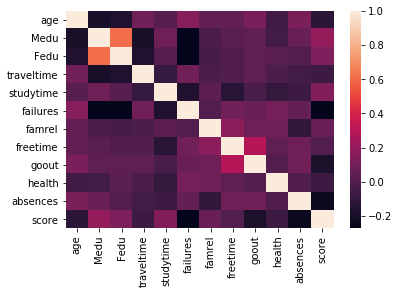

In [66]:
sns.heatmap(stud_math.corr())

In [73]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.191169,-0.167174,0.094453,0.018086,0.157916,0.050368,0.046351,0.123607,-0.050944,0.129016,-0.117285
Medu,-0.191169,1.000000,0.607656,-0.191069,0.081887,-0.258348,-0.023955,0.027749,0.035605,-0.044416,0.066703,0.190845
Fedu,-0.167174,0.607656,1.000000,-0.165856,0.016026,-0.272640,-0.031061,-0.005184,0.042336,0.027131,0.000197,0.124941
traveltime,0.094453,-0.191069,-0.165856,1.000000,-0.092257,0.093272,-0.023360,-0.008867,0.039342,-0.014465,-0.048267,-0.068727
studytime,0.018086,0.081887,0.016026,-0.092257,1.000000,-0.164916,0.033981,-0.133717,-0.029000,-0.097056,-0.070781,0.132819
failures,0.157916,-0.258348,-0.272640,0.093272,-0.164916,1.000000,-0.003562,0.092049,0.071001,0.106751,0.059555,-0.236027
famrel,0.050368,-0.023955,-0.031061,-0.023360,0.033981,-0.003562,1.000000,0.171281,0.087142,0.090672,-0.099445,0.065664
freetime,0.046351,0.027749,-0.005184,-0.008867,-0.133717,0.092049,0.171281,1.000000,0.294492,0.045139,0.083875,-0.002055
goout,0.123607,0.035605,0.042336,0.039342,-0.029000,0.071001,0.087142,0.294492,1.000000,0.004741,0.092347,-0.167267
health,-0.050944,-0.044416,0.027131,-0.014465,-0.097056,0.106751,0.090672,0.045139,0.004741,1.000000,-0.005136,-0.067289


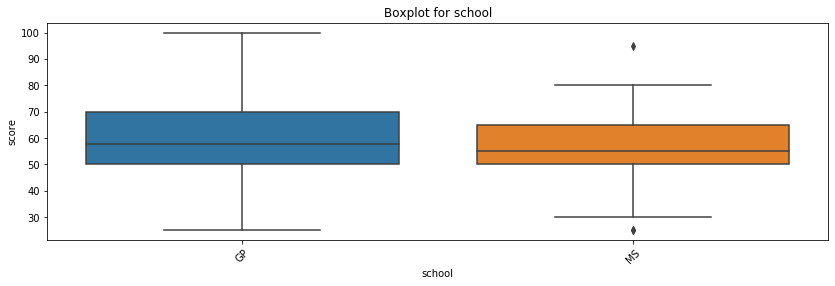

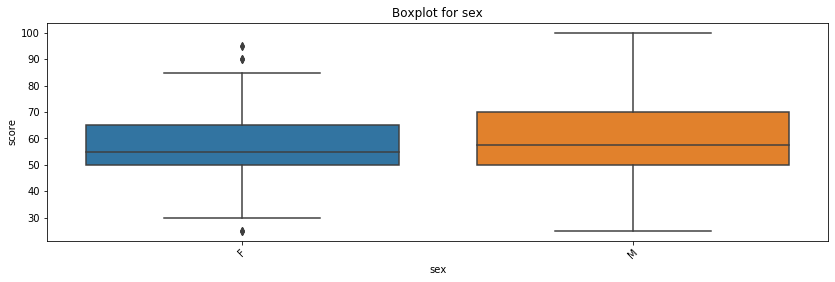

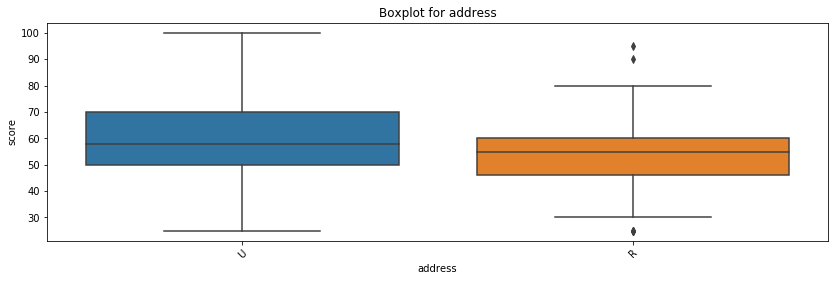

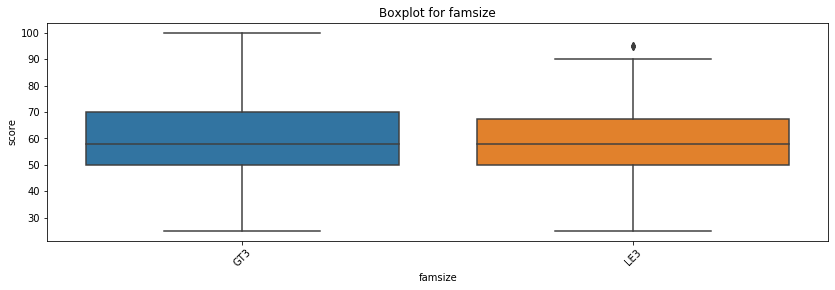

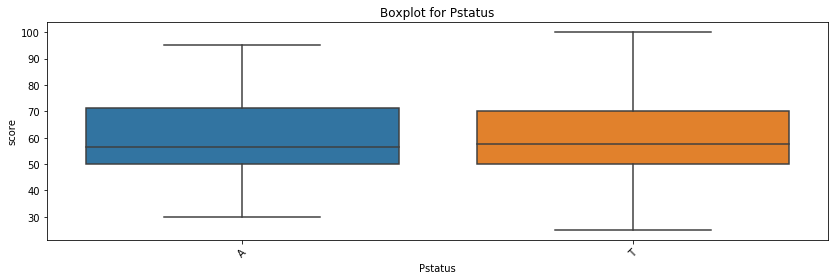

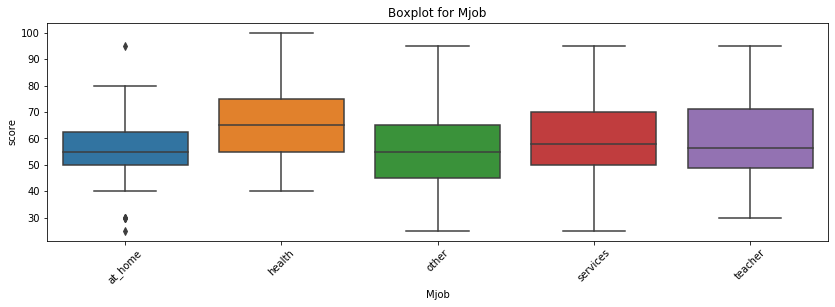

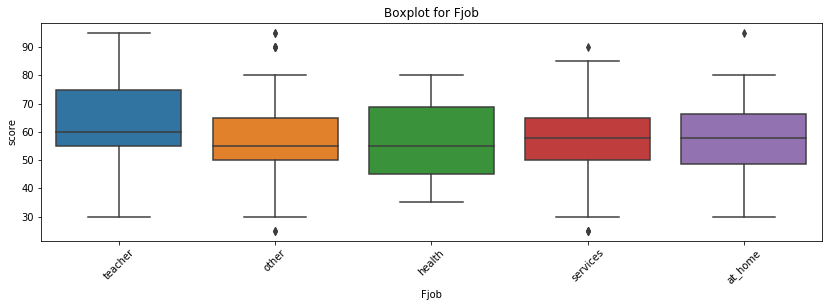

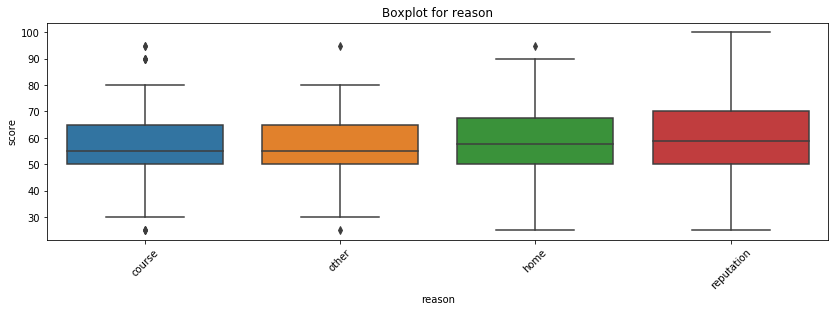

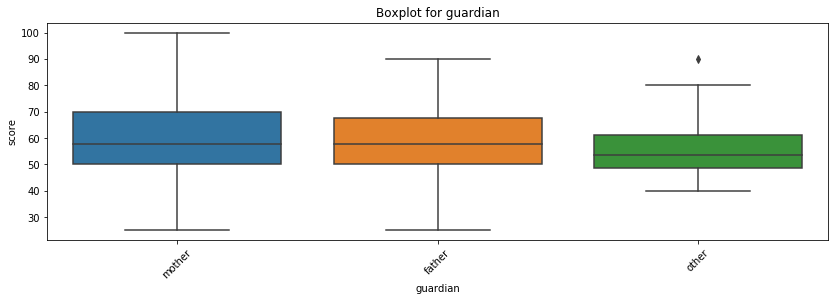

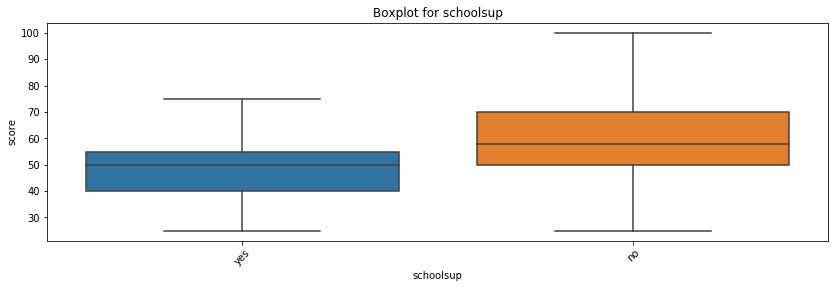

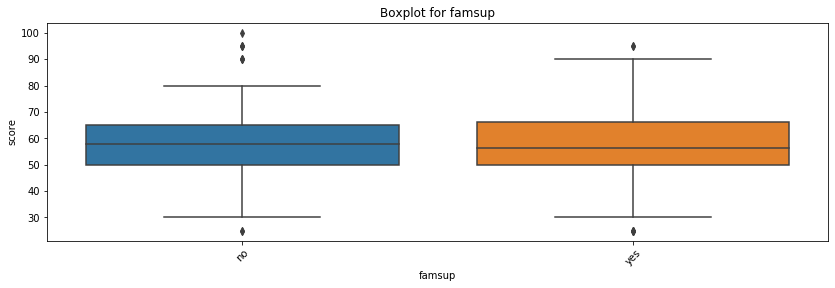

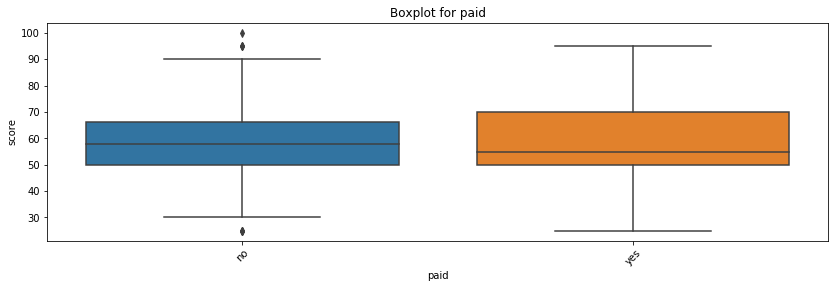

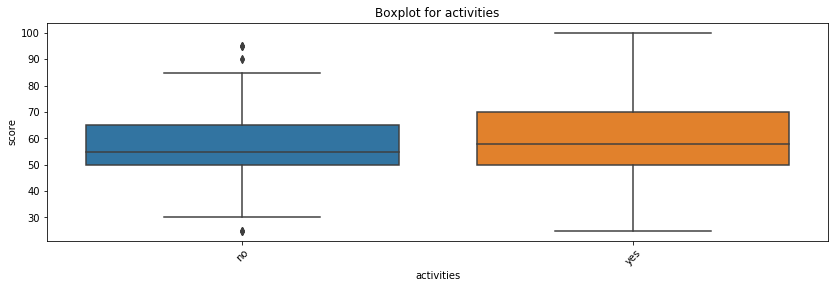

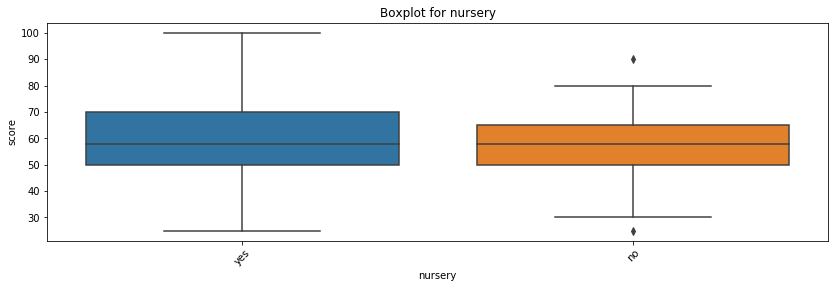

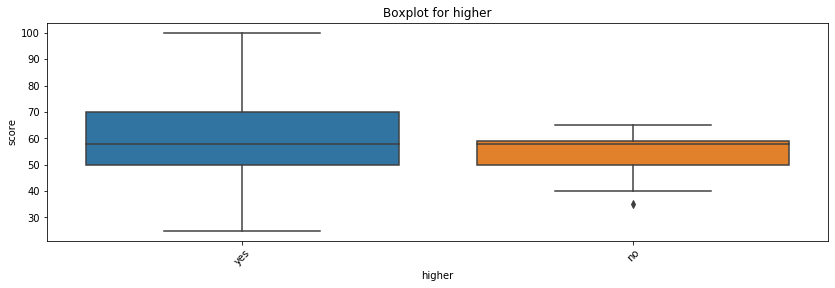

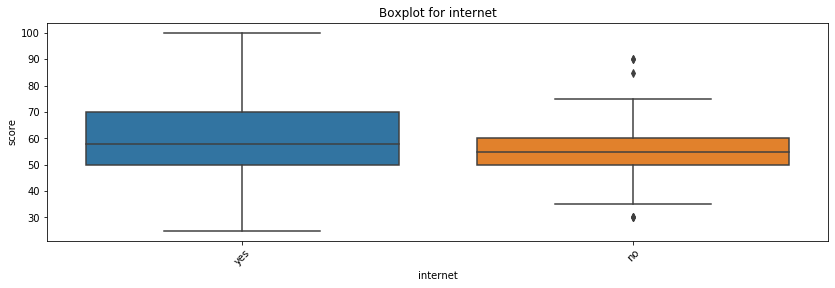

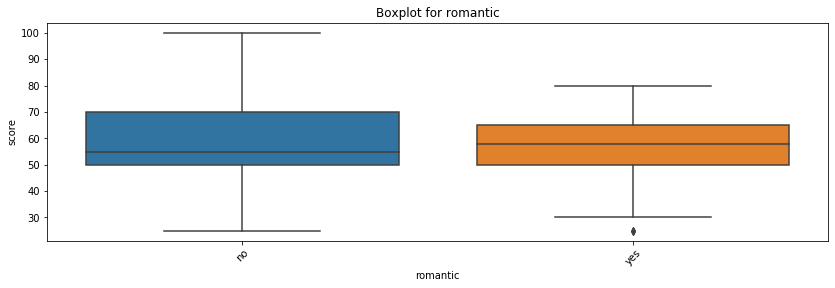

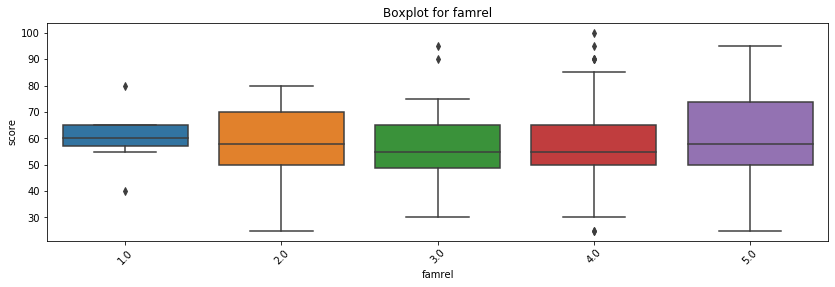

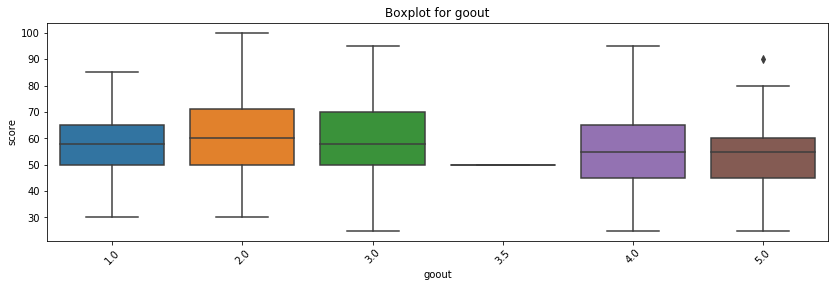

In [74]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'goout']:
    get_boxplot2(col)

In [85]:
for col in [
        'school',
        'sex',
        'address',
        'famsize',
        'Pstatus',
        'Medu',
        'Fedu',
        'Mjob',
        'Fjob',
        'reason',
        'guardian',
        'traveltime',
        'studytime',
        'failures',
        'schoolsup',
        'famsup',
        'paid',
        'activities',
        'nursery',
        'higher',
        'internet',
        'romantic',
        'famrel',
        'freetime',
        'goout',
        'health',
]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup


# Выводы